### Kaggle
데이터 분석

#### 데이터 분석의 순서 및 개요 
데이터 분석 흐름
1. 목적, 평가 지표 결정
2. 데이터 수집
3. 데이터 가공 및 전처리
4. 데이터 탐색 및 가시화
5. 특징 값 추출
6. 모델 작성, 예측 및 분류
7. 모델 검증


### 라이브러리 불러오기

In [11]:
import pandas as pd
import numpy as np
import random

### 데이터 셋 불러오기

In [12]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/gender_submission.csv")

### 데이터 셋 확인

In [13]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 랜덤 시드 설정

In [16]:
np.random.seed(1234)
random.seed(1234)

### 데이터 개요 파악
탐색적 데이터 해석

shape : 행, 열 데이터 표시
pd.set_option : 데이터 미리보기

In [17]:
print(train_df.shape)

(891, 12)


In [19]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 데이터 속성 확인하기
속성이란 데이터가 수치, 문자열인지 구분한다. 또, 그 외에도 형변환도 고려한다.

In [23]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 수치 데이터의 종류
* 질적 변수
: 수치 사이의 간격에 큰 의미가 없다.

명목 척도와 순서 척도로 분류할 수 있다.
명목 척도는 단지 분류를 위한 것.
순서 척도는 질적 변수 중에서도 순서 척도로 분류되는 예이다.

* 양적 변수
: 간격에 의미가 있는 수치

간격 척도와 비례 척도로 다시 분류할 수 있다.
간격 척도는 같은 간격의 눈금으로 측정 하는 것
비례 척도는 간격 척도를 만족시키면서 원점이 있어 데이터 비율에 의미가 있는 것을 의미


### 데이터 통계량 확인


In [24]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 카테고리 변수 확인
각 카테고리 열에 포함된 값, 중복 횟수 확인

In [25]:
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [26]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### 결측치 확인하기
데이터에 null이 있는지 확인

In [27]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 데이터의 시각화
matplotlib, seaborn 사용

### 시각화 라이브러리 불러오기

In [28]:
import matplotlib.pyplot as plt
import seaborn as sus

In [29]:
plt.style.use("ggplot")

### 목적 변수 관련 데이터의 시각화

#### 데이터츠레임에서 임의의 열 추출

In [30]:
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


### 시각화 데이터 중 결측치 제외
dropna() 사용. 결과적으로 2개 행 제거됨

In [31]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


### 원하는 변수의 값으로 집계하기

count로 PassengerId의 데이터 개수를 센다.

In [32]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

### 데이터 수평으로 반환
데이터 정렬 : 수직 / 수평 정렬

In [35]:
embarked_df= train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

### 누적 막대 그래프로 시각화하기

<Axes: xlabel='Embarked'>

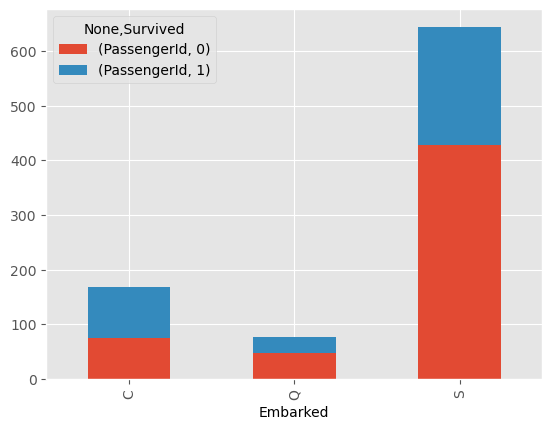

In [36]:
embarked_df.plot.bar(stacked = True)